# Chapter: Hierarchical segmentation with extinction values

# Reminder


The marker approach shows its limits in an open context, with generic images. The extinction values are an interesting alternative for producing perceptually relevant hierarchies.
The combination of extinction values with the MST results in effective interactive segmentation methods in terms of results and computation time. These methods are applied initially to the multimedia field and then they are used in the medical field .

Extinction values were introduced in 1995 (see references below). It is a value that associates to each minimum a measure of its importance. This importance is evaluated according to its size, its contrast or its volume. The volume extinction values better approximate the human visual system, associating to regions a score that combines both their size and their contrast.
The combination of extinction values and MST results in effective interactive segmentation methods in terms of results and computation time.


Volume extinction values and MST can be computed during the flooding process associated with watershed computation. At the end of the process, we have not only a partition but the whole hierarchy. Next figure illustrates this process. A node is created for each minimum. When two lakes meet during the flooding process, an edge is added between the corresponding nodes. The volume of the lakes involved in the merging are compared and the smallest value is given to the added edge. The illustrated figure has four minima: A, B, C and D. The first merge involves minima B and C. The volume of these lakes are 4 and 6 respectively. An edge between B and C is added, with a value 4.  Then C and D meet. Their respective volumes are 18 and 7. An edge of value 7 is added between C and D. And finally A and B merge, with volumes 9 and 40 respectively. An edge of value 9 is added between A and B. At the end of the process the MST is created with edges valuated with the volume extinction values.

MST computation during flooding process:

|<center>step 1</center>|<center>step 2</center>|<center>step 3</center>|
|--|--|--|
|<img src="../illustrations/MST/MST_step1.png"/> | <img src="../illustrations/MST/MST_step2.png"/>| <img src="../illustrations/MST/MST_step3.png"/>|




|<center>partition+MST</center>|<center>valuated MST</center>|<center>segmentation in 3 regions</center>|
|--|--|--|
|<img src="../illustrations/MST/partition+graphe.png" title="step1"> | <img src="../illustrations/MST/graph_value.png" title="step2">| <img src="../illustrations/MST/seg_3reg.png" title="step3">|

<!--
![Attributes illustration](files/images/attributes_illustration.jpg)
-->


# Example

|Original | Dynamic | Area | Volume|
|:---:|:---:|:---:|:---:|
|<img src="../illustrations/foreman.png" style="width: 150px;" title="ori"/> | <img src="../illustrations/res02_10reg_dynamic.png" style="width: 150px;"/>| <img src="../illustrations/res02_10reg_area.png" style="width: 150px;"/>| <img src="../illustrations/res02_10reg_volume.png" style="width: 150px;" /> |


You can try this operator with other images or other sizes hereafter.

We provide functions for you to test easily the multiscale segmentation.

In general, functions dealing with graphs require 16-bits images (<code>UINT16</code>).

#### Generate a graph from a mosaic image

<code>gr = mosaicToGraph( imSeg [, imValues, nl] )</code> : returns the neighborhood graph associated with <code>imSeg</code> with connexity defined by nl. If <code>imValues</code> is provided, the graph edges are valued with the minimum value of <code>imValues</code> found along the respective two connected regions boundary.
<code>imSeg</code> should be a labeled image (use <code>label( imIn, imSeg [, nl] )</code>).


#### Generate a partition from a graph

<code>graphToMosaic( imFineSeg, Forest, imSeg )</code> : Labels the connected components of the <code>Forest</code> graph and generates the associated partition (<code>imSeg</code>).

* <code>imFineSeg</code> (input): image containing the lowest level of the hierarchy. It establishes the correspondence between regions of the image and nodes of the graph.

* <code>Forest </code> (input): graph containing edges between merged regions, according to the selected level of the hierarchy.

* <code>imOut</code> (output): partition image associated to the forest (the selected level of the hierarchy).


#### Image based extinction values

<code>imEV = watershedEVI(imGrad,EVType[,nl])</code>: floods <code>imGrad</code> and returns <code>imEV</code>, an image with gradient minima labelled with their corresponding extinction values (the most important minimum = $1$, the less important = $N-1$, being $N$ the number of minima). <code>EVType</code> determines the extinction value type: “v” for volumic, “d” for dynamics and “a” for area based hierarchical approach.

<code>getEVLevelI( imGrad, imEV, numRegions, imSeg, nl )</code>: returns <code>imSeg</code> with the selected number of regions.


#### Segmentation and Minimum Spanning Tree (MST)

<code>imFineSeg, MST = watershedEV(imGrad, EVType[ ,nl])</code>: floods <code>imGrad</code> and returns <code>imFineSeg</code> (the lowest level of the hierarchy, the finest pertition) and the graph MST containing the hierarchy as edge values (the most important edge = $1$, the less important = $N-1$, being $N$ the number of regions of the finest partition).
<code>EVType</code> determines the extinction value type: “v” for volumic, “d” for dynamics and “a” for area based hierarchical approach.

<code>getEVLevel(imFineSeg, MST, numRegions, imSeg)</code>: returns <code>imSeg</code>, the segmentation obtained by merging regions in imFineSeg according to MST until there are only <code>numRegions</code> left.

# Execution

In [1]:
import sys
sys.path.append('/home/commun/tp-morpho/')
from tp_init import *

In [2]:
# -----------------------------------------------------------------------
# Multiscale Segmentation
# -----------------------------------------------------------------------
def watershedEV(imgra,EVType,nl=Morpho.getDefaultSE()):
    imFineSeg = Image(imgra,"UINT16")
    g = watershedExtinctionGraph(imgra,imFineSeg,EVType,nl)
    return imFineSeg,g

def getEVLevel(imFineSeg,g,    Nregions, imSeg):
    g2 = g.clone() # edges are removed, clone the graph so you can get other partitions in further function calls
    g2.removeLowEdges(Nregions)# removeLowEdges( EdgeWeightType EdgeThreshold)
    graphToMosaic(imFineSeg, g2, imSeg)

def watershedEVI(imgra,EVType,nl=Morpho.getDefaultSE()):
    imEV = Image(imgra,"UINT16")
    watershedExtinction(imgra,imEV,EVType,nl)
    return imEV

def getEVLevelI(imgra,imEV, Nregions, imSeg,nl=Morpho.getDefaultSE()):
    imMark = Image(imEV)
    compare(imEV,">",Nregions,0,imEV,imMark)
    basins(imgra,imMark,imSeg,nl)


Image based approach: 20 regions.


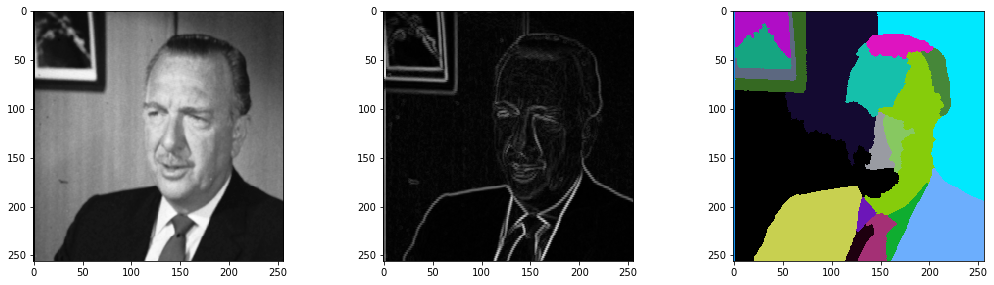

Graph based approach: 20 regions.


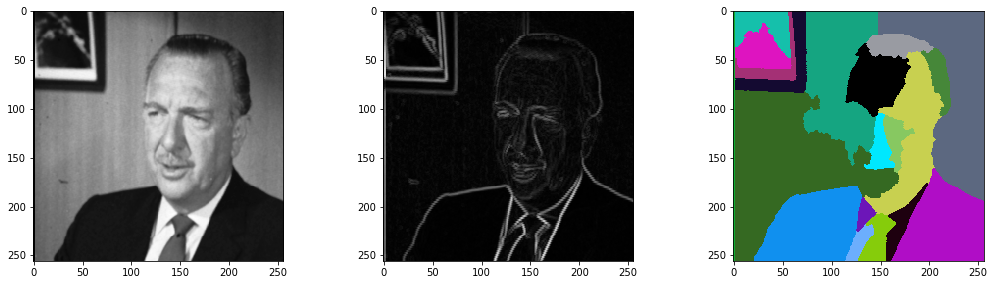

In [3]:
# Select neighborhood
nl = HexSE()
# Read input image
#im = Image(images_dir+"/Gray/foreman.png")
#im = Image(images_dir+"/Gray/foreman_y.png")
im = Image(images_dir+"/Gray/walter.png")
#im = Image(images_dir+"/Gray/lena.png")
#im = Image(images_dir+"/Gray/bream001_y.png")


# Allocate auxiliary image
im2,imtmp=Image(im),Image(im)

imGrad = Image(im)
imSeg = Image(im,"UINT16")

# Compute the gradient
gradient(im, imGrad ,nl)

numRegions = 20
EVType = "v"


#IMAGE BASED HIERARCHICAL APPROACH
imEV = watershedEVI( imGrad,  EVType, nl) # EVType=["d", "a", "v"]

# ------------------------------
# Obtain several levels of the hierarchy
# ------------------------------
getEVLevelI(imGrad,imEV, numRegions, imSeg, nl)
print('Image based approach: '+str(maxVal(imSeg))+' regions.')
disp([im,imGrad,imSeg],[False,False,True])

#GRAPH BASED HIERARCHICAL APPROACH
imFineSeg, MST = watershedEV(imGrad, EVType, nl)
# ------------------------------
# Obtain several levels of the hierarchy
# ------------------------------
getEVLevel( imFineSeg, MST, numRegions, imSeg )
####################
# Re-labeling imSeg for easier comparison with the previous method
# (otherwise colors of neighbooring regions are often too close)
labvals = np.unique(np.array([imSeg[i] for i in range(imSeg.getWidth()*imSeg.getHeight())])) 
nr = len(labvals)
np.random.shuffle(labvals)
imSeg2 = Image(imSeg)
imSeg2 << 0
i = 0
for l in labvals:
    i = i+1
    compare(imSeg, '==', int(l), i, imSeg2, imSeg2)
copy(imSeg2, imSeg)
######################
print('Graph based approach: '+str(nr)+' regions.')
disp([im,imGrad,imSeg],[False,False,True])



# References

</OL>
<H3><A NAME=SECTIONExtinctionValues> Extinction values</A></H3>
<P>

<OL>
<LI>
M. Grimaud. <em>New measure of contrast: the dynamics</em>. International Society for Optics and Photonics,San Diego'92, 292--305,1992.   <A HREF="publi_pdf/MM_refs/meyer/dynamics_grimaud92.bib"> paper.</A> <A HREF="publi_pdf/MM_refs/meyer/dynamics_grimaud92.bib"> bib.</A> 

<LI>
C. Vachier and  L. Vincent. <em>Valuation of image extrema using alternating filters by reconstruction</em>. SPIE's 1995 International Symposium on Optical Science, Engineering, and Instrumentation, 94--103, 1995. <A HREF="publi_pdf/MM_refs/vachier/95spie_dynamics.pdf"> paper.</A> <A HREF="publi_pdf/MM_refs/vachier/95spie_dynamics.bib"> bib.</A>

<LI>
C. Vachier., F. Meyer. <em> Extinction value: a new measurement of persistence</em>. IEEE Workshop on Nonlinear Signal and Image Processing, June 1995, 254--257, Neos Marmaras, Greece.
<A HREF="publi_pdf/MM_refs/vachier/valeur_extinction_vachier.pdf">paper.</A> <A HREF="publi_pdf/MM_refs/vachier/valeur_extinction_vachier.bib"> bib.</A> 

</OL>
<H3><A NAME=SECTIONMST> MST</A></H3>
<P>

<OL>
<LI>
F. Meyer. <em> Minimum spanning forests for morphological segmentation</em>. ISMM 94, 77--84, 1994.
<A HREF="publi_pdf/MM_refs/meyer/minimum_spanning_forests_fm.pdf">paper.</A> <A HREF="publi_pdf/MM_refs/meyer/minimum_spanning_forests_fm.bib"> bib.</A> 

<LI>
F. Zanoguera, B. Marcotegui, F. Meyer. "A Toolbox for Interactive Segmentation Based on Nested Partitions" <em>ICIP-99</em>, Kobe (Japan), October 1999. <A HREF="publi_pdf/icip99_spatialseg.pdf">paper.</A>

<LI> 
F. Meyer. <em> An Overview of Morphological Segmentation</em>. Intern. Journal of Pattern Recognition and Artificial Intelligence, vol 15, number 7, 1089-1118, 2001.
<A HREF="publi_pdf/MM_refs/meyer/Meyer2001_AnOverviewOfMorphologicalSegmentation.pdf">paper.</A> <A HREF="publi_pdf/MM_refs/meyer/Meyer2001_AnOverviewOfMorphologicalSegmentation.bib"> bib.</A> 


</OL>



# Aplications

Several applications have been studied in different